# Bike Sharing
Task: Predict the number of rentals on a given day or hour.
This data set is from the UCI data sets and can be found [here](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
bikes = pd.read_csv('hour.csv')
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## EDA

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


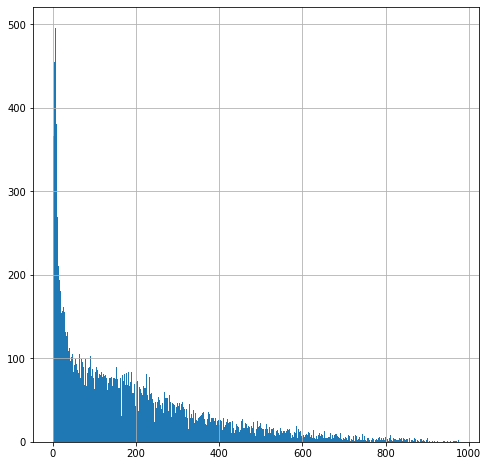

In [6]:
plt.figure(figsize=(8,8))
bikes['cnt'].hist(bins=500)

In [7]:
#Most often there are very few rentals per hour but neve zero.
noRentals = bikes[bikes['cnt'] == 0]
len(noRentals)

0

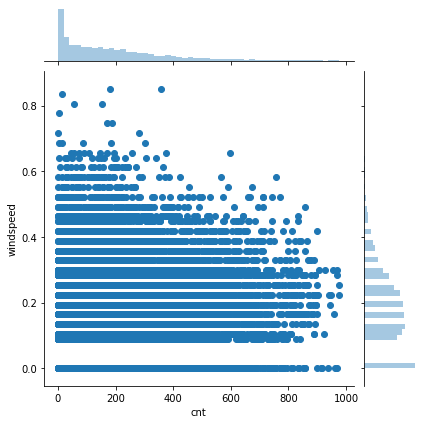

In [8]:
sns.jointplot(x='cnt', y='windspeed',data=bikes)

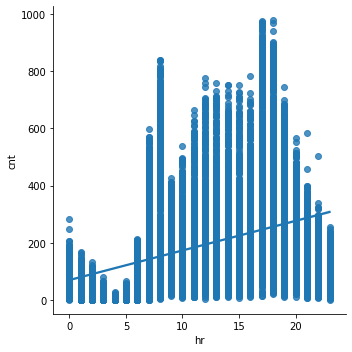

In [9]:
sns.lmplot(x='hr', y='cnt', data=bikes )

## Feature Engineering
This data is pretty clean, but the thought is to turn the timestamps into the week of the year since we already have the day and 
the time

In [10]:
bikes['day of year'] = pd.to_datetime(bikes['dteday']).apply(lambda x: x.dayofyear)
bikes['week of year'] = pd.to_datetime(bikes['dteday']).apply(lambda x: x.weekofyear)

In [11]:
bikes.drop('dteday', axis=1, inplace=True)
bikes.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day of year,week of year
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,52
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,52
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,52
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,52
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,52


# Linear Regression

In [12]:
X = bikes.drop(['casual', 'registered', 'cnt'], axis=1)
y = bikes['cnt']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
linearPred = linReg.predict(X_test)

In [19]:
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(y_test, linearPred))}')

RMSE = 140.12355899596932
